# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the car accidents in the UK. The data that we have ranges from 1969 to 1984.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data from the '.csv' file as a monthly Time Series.

In [ ]:
df = pd.read_csv('Seatbelts.csv')
df.head()

In [ ]:
df.drop(labels='Unnamed: 0',inplace=True,axis=1)
df.head()

In [ ]:
date = pd.date_range(start='1/1/1969', end='1/1/1985', freq='M')
date

In [ ]:
df.set_index(keys='Time_Stamp',inplace=True,drop=True)
df.head()

## Plot the Time Series to understand the behaviour of the data.

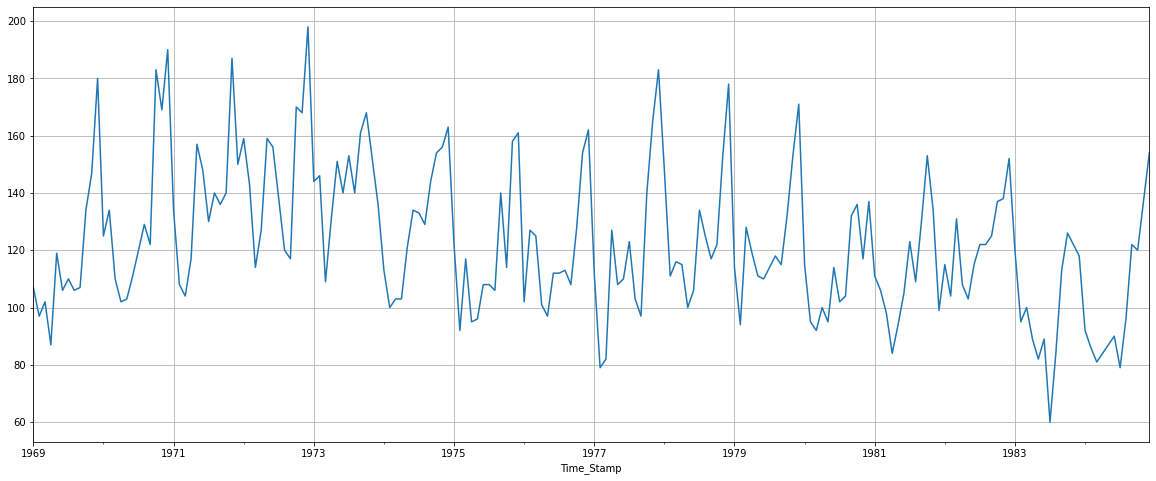

In [10]:
df['DriversKilled'].plot(figsize=(20,8))
plt.grid();

## Check the basic measures of descriptive statistics

In [ ]:
df[df.columns[0:3]].describe()

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

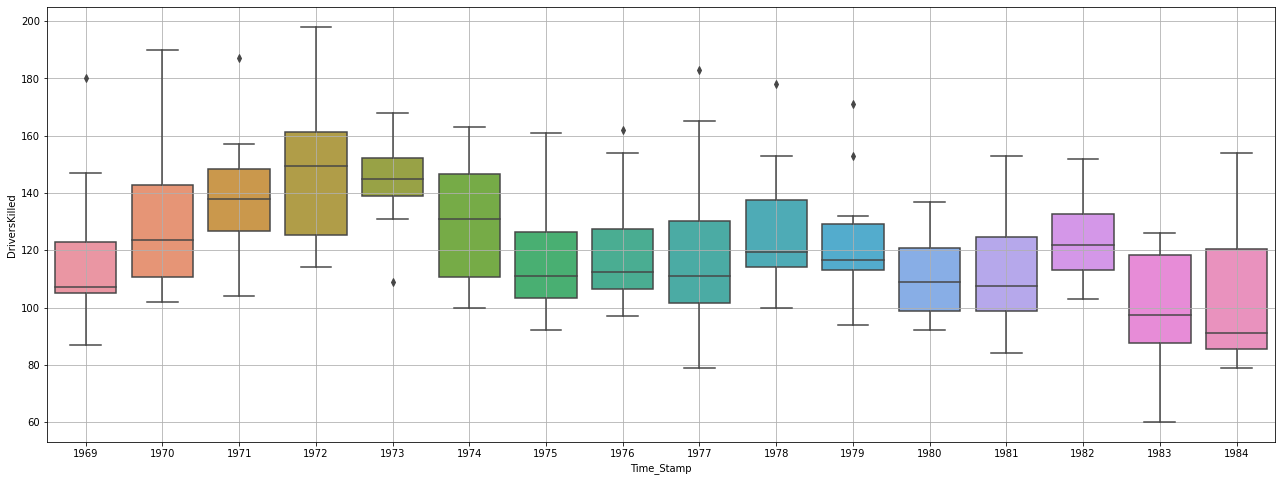

In [12]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df['DriversKilled'],ax=ax)
plt.grid();

### Monthly Plot

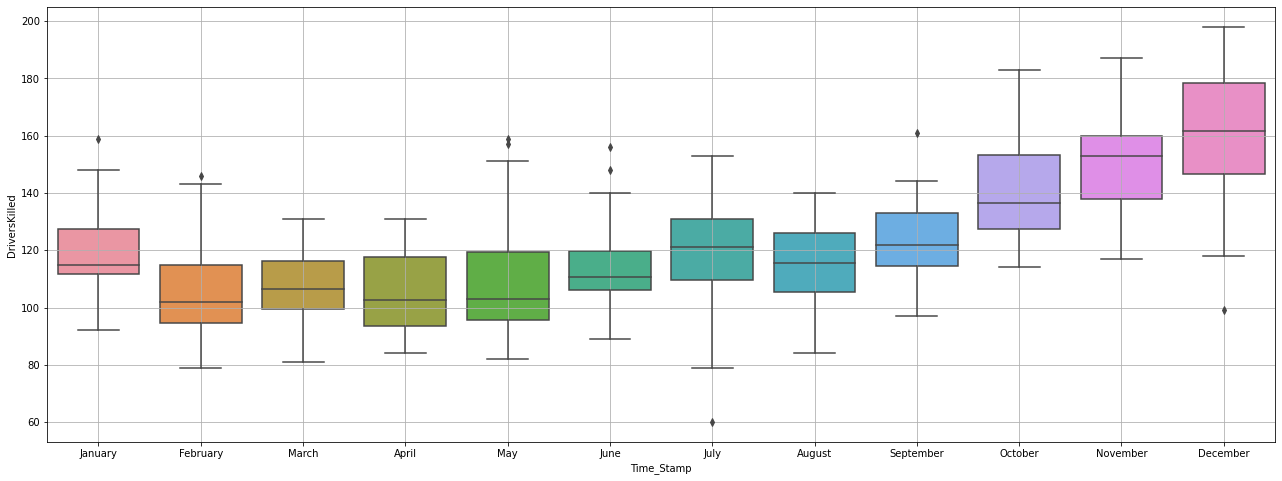

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df['DriversKilled'],ax=ax)
plt.grid();

There is a clear distinction of 'DriversKilled' within different months spread across various years. The highest such numbers are being recorded in the month of December across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['DriversKilled'],ylabel='DriversKilled')
plt.grid();

## Plot a graph of monthly accidents across years.

In [ ]:
monthly_sales_across_years = pd.pivot_table(df, values = 'DriversKilled', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

In [ ]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

As seen from the boxplot as well, there is a some degree of irregularity among these accidents across various years for different months.

## Plot the Empirical Cumulative Distribution.

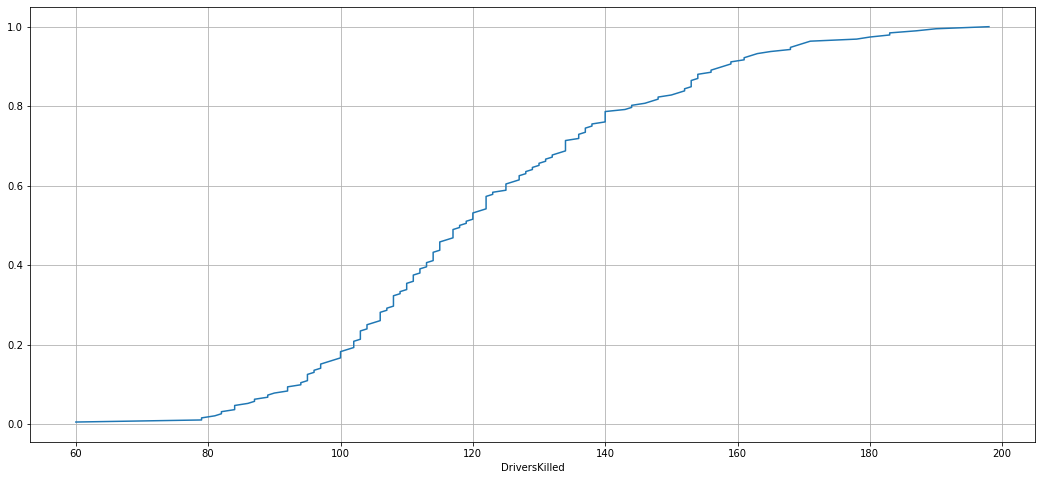

In [16]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['DriversKilled'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('DriversKilled');

## Check the correlation between the various variables.

In [ ]:
plt.figure()
sns.heatmap(df[df.columns[0:3]].corr(),annot=True,mask = np.triu(df[df.columns[0:3]].corr(),+1));

## Plot the average Driver accidents per month and the month on month percentage change of Driver accidents.

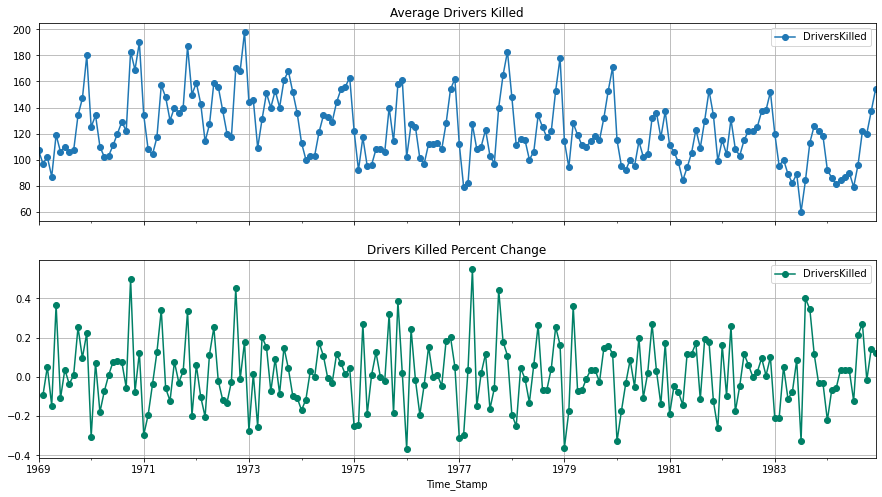

In [18]:
# group by date and get average Customers, and precent change
average    = df.groupby(df.index)["DriversKilled"].mean()
pct_change = df.groupby(df.index)["DriversKilled"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Drivers Killed",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Drivers Killed Percent Change",grid=True)

## Plot the variables with respect to a month on month percentage change to understand the change of different variables on the 'DriversKilled' variable.

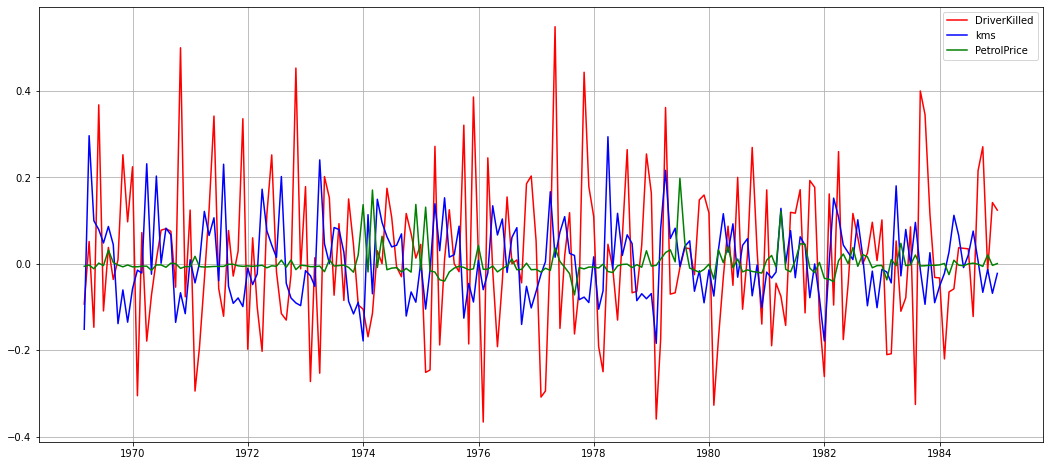

In [19]:
plt.figure(figsize=(18,8))

plt.plot(df.groupby(df.index)["DriversKilled"].sum().pct_change(),label='DriverKilled',color='Red')
plt.plot(df.groupby(df.index)["kms"].sum().pct_change(),label='kms',color='Blue')
plt.plot(df.groupby(df.index)["PetrolPrice"].sum().pct_change(),label='PetrolPrice',color='Green')

plt.legend(loc='best')
plt.grid();

## Decompose the Time Series and plot the different components.

In [ ]:
decomposition = seasonal_decompose(df['DriversKilled'],model='multiplicative')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1969-01-31           NaN
1969-02-28           NaN
1969-03-31           NaN
1969-04-30           NaN
1969-05-31           NaN
1969-06-30           NaN
1969-07-31    117.583333
1969-08-31    119.875000
1969-09-30    121.750000
1969-10-31    122.708333
1969-11-30    122.666667
1969-12-31    122.208333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1969-01-31    -1.759722
1969-02-28   -15.379167
1969-03-31   -16.059722
1969-04-30   -16.595833
1969-05-31   -12.395833
1969-06-30    -6.695833
1969-07-31    -5.281944
1969-08-31    -7.476389
1969-09-30     0.345833
1969-10-31    18.612500
1969-11-30    27.776389
1969-12-31    34.909722
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1969-01-31          NaN
1969-02-28          NaN
1969-03-31          NaN
1969-04-30          NaN
1969-05-31          NaN
1969-06-30          NaN
1969-07-31    -2.301389
1969-08-31    -6.398611
1969-09-30   -15.095833
1969-10-31    -7.320833
1969-11-30    -3.443056
1969-12-31    22.88

## Check for stationarity of the whole Time Series data.

In [23]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1979. Test Data is from the beginning of 1979 to the last time stamp provided.

In [28]:
train=df[df.index.year < 1979]
test=df[df.index.year >= 1979]

## Check for stationarity of the Training Data Time Series.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a first difference of the Time Series. Then we can use this particular differenced series to train the models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1969-01-31 to 1978-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriversKilled  120 non-null    int64  
 1   kms            120 non-null    int64  
 2   PetrolPrice    120 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.8 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Predict on the Test Set using this model and evaluate the model.

## Building the Full Data for the upcoming 12 Months.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Predict on the Test Set using this model and evaluate the model.

## Building the model on the Full Data for the upcoming 12 Months.

## Build an Automated version of a SARIMAX [with exogenous variables] model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

## Predict on the Test Set using this model and evaluate the model.

## Building the model on the Full Data.

## Building a Time Varying Linear Model[TVLM] SARIMA.

## Predict on the Test Set using this model and evaluate the model.

## Building the iterations of the models based on the ACF and PACF plots.

Let us look at the ACF and PACF plots on the training data.

### SARIMA Model

## Predict on the Test Set using this model and evaluate the model.

### SARIMAX Model

## Predict on the Test Set using this model and evaluate the model.

### SARIMAX_TVLM Model

## Predict on the Test Set using this model and evaluate the model.

# END